In [164]:
import csv
names = ['victim_name','victim_age','victim_gender','victim_race','victim_image_url','date','address','city','state','zip','county','agency_responsible','cause_of_death','description','disposition','charges','source','mentally_ill','armed']
f = open('data/data.csv', 'r')
reader = csv.DictReader(f, fieldnames=names)
data = [row for row in reader]
data.pop(0)


{'victim_gender': "Victim's gender",
 'victim_image_url': 'URL of image of victim',
 'victim_race': "Victim's race",
 'zip': 'Location of death (zip code)',
 'state': 'Location of death (state)',
 'victim_age': "Victim's age",
 'charges': 'Criminal Charges?',
 'mentally_ill': 'Symptoms of mental illness?',
 'disposition': 'Official disposition of death (justified or other)',
 'address': 'Location of injury (address)',
 'source': 'Link to news article or photo of official document',
 'county': 'Location of death (county)',
 'description': 'A brief description of the circumstances surrounding the death',
 'agency_responsible': 'Agency responsible for death',
 'cause_of_death': 'Cause of death',
 None: ['', '', '', '', '', '', '', '', '', ''],
 'victim_name': "Victim's name",
 'date': 'Date of injury resulting in death (month/day/year)',
 'armed': 'Unarmed',
 'city': 'Location of death (city)'}

In [165]:
import pandas

frame = pandas.DataFrame(data)
frame = frame.drop(None, 1)
frame.describe()

,address,agency_responsible,cause_of_death,charges,county,description,disposition,mentally_ill,source,state,victim_age,victim_gender,victim_image_url,victim_race,zip,victim_name,date,armed,city
count,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485
unique,3389,1723,32,9,765,3399,41,16,3404,51,86,5,2257,7,2572,3416,1040,4,1660
top,,Los Angeles Police Department,Gunshot,No Known Charges,,,Unreported,No,http://www.abqjournal.com/apd-under-fire-incid...,CA,28,Male,,White,,Name withheld by police,6/16/13,Allegedly Armed,Los Angeles
freq,32,65,2996,3399,188,49,1251,1932,9,596,120,3261,1216,1522,219,57,10,2551,58


In [163]:
pandas.to_datetime(frame['date']).describe()

count                    3485
unique                   1040
top       2013-06-16 00:00:00
freq                       10
first     2013-01-01 00:00:00
last      2015-12-31 00:00:00
Name: date, dtype: object

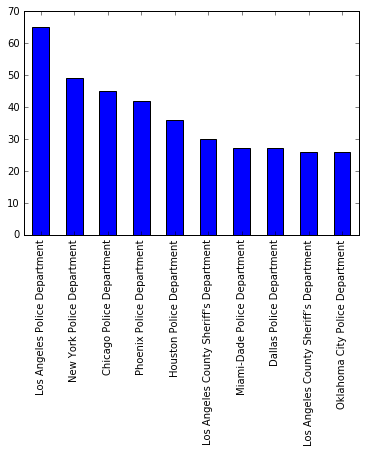

In [57]:
%matplotlib inline

agencies[:10].plot(kind='bar')


In [166]:
frame['victim_gender'].value_counts()

Male       3261
Female      217
Unknown       3
              3
White         1
Name: victim_gender, dtype: int64

In [168]:
nonsense_genders = frame['victim_gender'].str.contains('White')
frame.loc[nonsense_genders, 'victim_gender'] = 'Unknown'
blank_genders = frame['victim_gender'].str.len() == 0
frame.loc[blank_genders, 'victim_gender'] = 'Unknown'
frame['victim_gender'].value_counts()

Male       3261
Female      217
Unknown       7
Name: victim_gender, dtype: int64

Male       3261
Female      217
Unknown       7
Name: victim_gender, dtype: int64

In [109]:
multi_agency = frame[frame['agency_responsible'].str.contains(',')]
multi_agency

,address,agency_responsible,cause_of_death,charges,county,description,disposition,mentally_ill,source,state,victim_age,victim_gender,victim_image_url,victim_race,zip,victim_name,date,armed,city
21,101 Elmwood Ave,"Vermont State Police, Drug Enforcement Adminis...",Gunshot,No Known Charges,,Police were conducting a drug raid when they c...,,,http://www.wptz.com/news/police-investigate-la...,VT,56,Male,http://www.killedbypolice.net/victims/151173.jpg,White,,Kenneth Stephens,12/22/15,Allegedly Armed,Burlington
38,1900 Lear Dr,"Northwood Police Department, Oregon Police Div...",Gunshot,No Known Charges,,Officers were pursuing Lauro and two men she w...,,,http://www.toledoblade.com/Police-Fire/2015/12...,OH,22,Female,http://www.killedbypolice.net/victims/151151.jpg,White,,Erica Lauro,12/18/15,Allegedly Armed,Northwood
53,Tennessee Hwy 187,"Milan Police Department, Gibson County Sheriff...",Gunshot,No Known Charges,,"Thomason, a suspect in a homicide from the pre...",,,http://www.jacksonsun.com/story/news/crime/201...,TN,56,Male,http://www.killedbypolice.net/victims/151139.jpg,White,,Michael Thomason,12/14/15,Unclear,Milan
104,US-36 and SW Thornton Road,"Dekalb County Sheriff's Department, Missouri S...",Gunshot,No Known Charges,,Law enforcement responded to a report of a dom...,,,http://www.kshb.com/news/crime/man-dead-in-off...,MO,53,Male,http://www.killedbypolice.net/victims/151080.jpg,White,,Lionel Kerns,11/29/15,Allegedly Armed,Stewartsville
108,305 N 2nd Ave,"Ozark Police Department, Christian County Sher...",Gunshot,No Known Charges,,peer was fatally shot during an exchange of gu...,,,http://www.ky3.com/news/local/law-enforcement-...,MO,37,Female,http://www.killedbypolice.net/victims/151074.jpg,White,,Somer Brook Speer,11/25/15,Allegedly Armed,Ozark
114,700 40th Ave NE,"Columbia Heights Police Department, Fridley Po...",Gunshot,No Known Charges,,Officers were responding to a domestic violenc...,,,http://minnesota.cbslocal.com/2015/11/24/repor...,MN,45,Male,http://www.killedbypolice.net/victims/151070.jpg,White,,Michael Gerald Ray Kirvelay,11/24/15,Unclear,Columbia Heights
165,Three Lick Rd,"West Virginia State Police, US Marshals",Gunshot,No Known Charges,,"Hudson and another woman, both fugitives, open...",,,http://wvmetronews.com/2015/11/09/one-dead-one...,WV,26,Male,http://www.killedbypolice.net/victims/151019.jpg,White,,Dale Maverick Hudson,11/9/15,Allegedly Armed,Orlando
171,10100 Puttington Dr,"Lakeshire Police Department, St Louis County P...",Gunshot,No Known Charges,,Hohman allegedly attacked his sister and 12-ye...,,,http://www.kmov.com/story/30452751/police-open...,MO,30,Male,,White,,Jacob Hohman,11/5/15,Allegedly Armed,Lakeshire
179,2800 Gainesville St SE,"Prince George's County Police Department, Fore...",Gunshot,No Known Charges,District of Columbia,"Covington, an alleged carjacker, died after ex...",Pending investigation,No,http://www.wusa9.com/story/news/local/dc/2015/...,DC,62,Male,,Black,20020,James Covington Jr.,11/2/15,Allegedly Armed,Washington
182,2300 Good Hope Rd SE,"Special police, Washington DC",Unknown,No Known Charges,District of Columbia,Smith died shortly after he was found unconsci...,Pending investigation,No,https://www.washingtonpost.com/local/public-sa...,DC,27,Male,http://www.bet.com/news/national/2015/11/05/an...,Black,20020,Alonzo Smith,11/1/15,Unarmed,Washington


Not totally sure what to do about this duplicate problem yet.

In [82]:
frame['agency_responsible'].str.split(',')

0              [Las Vegas Metropolitan Police Department]
1                             [Rawlins Police Department]
2                         [Los Angeles Police Department]
3                              [Fresno Police Department]
4                    [Merced County Sheriff's Department]
5                         [Jacksonville Sheriff's Office]
6                             [Suffolk Police Department]
7                               [Tempe Police Department]
8                        [George County Sheriff's Office]
9                             [Phoenix Police Department]
10                            [Chicago Police Department]
11                            [Lansing Police Department]
12                            [Chicago Police Department]
13                          [Palo Alto Police Department]
14              [Charlotte-Mecklenberg Police Department]
15                        [Porterville Police Department]
16                    [East Baton Rouge Sheriff's Office]
17            

In [107]:
cities = pandas.read_csv('data/cities.csv')
cities

,State,State Abrv.,City,Total,White,Black,Amer. Indian,Asian,Hawaiian,Asian/Pacific Islander,...,Violent Crime Rate,Population,Violent crime,Murder and nonnegligent manslaughter,Black Armed,White Armed,Hispanic Armed,Asian/Pacific Islander Armed,Unknown Armed,Black Male Police Homicide Rate
0,Florida,FL,Hialeah,"224,669","9,511","6,066",73,697,2,699,...,3.3,"234,182",774,13,1,1,0,0,0,329.706561
1,New Mexico,NM,Albuquerque,"545,852","229,933","14,878","20,627","13,674",418,14092,...,7.7,"558,165","4,325",37,2,3,3,0,0,268.853341
2,Wisconsin,WI,Madison,"233,209","176,463","16,507",763,"17,126",67,17193,...,3.6,"242,523",884,5,1,1,0,0,0,121.160720
3,Oklahoma,OK,Tulsa,"391,906","227,021","61,230","19,473","8,926",278,9204,...,9.7,"394,498","3,827",60,1,2,1,0,0,97.991181
4,Nevada,NV,North Las Vegas,"216,961","67,687","41,561",871,"13,122","1,684",14806,...,8.0,"225,632","1,806",7,2,0,0,0,0,96.244075
5,Texas,TX,San Antonio,"1,327,407","353,106","83,365","2,771","30,596","1,097",31693,...,6.3,"1,399,725","8,828",72,3,2,1,0,1,95.963534
6,California,CA,Bakersfield,"347,483","131,311","26,677","2,265","20,496",357,20853,...,5.1,"361,859","1,857",24,0,0,0,0,0,74.970949
7,Oklahoma,OK,Oklahoma City,"579,999","328,582","85,744","18,208","23,051",464,23515,...,8.3,"605,034","4,998",62,3,4,2,0,0,69.975742
8,New Jersey,NJ,Jersey City,"247,597","53,236","59,060",586,"58,106",95,58201,...,6.4,"256,886","1,655",20,1,0,0,0,0,67.727735
9,Arizona,AZ,Phoenix,"1,445,632","672,573","86,788","23,327","43,894","2,055",45949,...,6.3,"1,502,139","9,492",118,0,6,4,0,0,67.100000


In [127]:
city_names = cities[['City', 'State Abrv.']]
city_names.columns = ['city', 'state']
city_names

,city,state
0,Hialeah,FL
1,Albuquerque,NM
2,Madison,WI
3,Tulsa,OK
4,North Las Vegas,NV
5,San Antonio,TX
6,Bakersfield,CA
7,Oklahoma City,OK
8,Jersey City,NJ
9,Phoenix,AZ


In [169]:
# Limit the murders to the largest cities
merged = frame.merge(city_names, on=['city', 'state'])
merged.to_csv(path_or_buf='./data/filtered.csv', index_label='key')


In [118]:
multi_agency_filtered = filtered_murders[filtered_murders['agency_responsible'].str.contains(',')]
multi_agency_filtered

,address,agency_responsible,cause_of_death,charges,county,description,disposition,mentally_ill,source,state,victim_age,victim_gender,victim_image_url,victim_race,zip,victim_name,date,armed,city
165,Three Lick Rd,"West Virginia State Police, US Marshals",Gunshot,No Known Charges,,"Hudson and another woman, both fugitives, open...",,,http://wvmetronews.com/2015/11/09/one-dead-one...,WV,26,Male,http://www.killedbypolice.net/victims/151019.jpg,White,,Dale Maverick Hudson,11/9/15,Allegedly Armed,Orlando
179,2800 Gainesville St SE,"Prince George's County Police Department, Fore...",Gunshot,No Known Charges,District of Columbia,"Covington, an alleged carjacker, died after ex...",Pending investigation,No,http://www.wusa9.com/story/news/local/dc/2015/...,DC,62,Male,,Black,20020,James Covington Jr.,11/2/15,Allegedly Armed,Washington
182,2300 Good Hope Rd SE,"Special police, Washington DC",Unknown,No Known Charges,District of Columbia,Smith died shortly after he was found unconsci...,Pending investigation,No,https://www.washingtonpost.com/local/public-sa...,DC,27,Male,http://www.bet.com/news/national/2015/11/05/an...,Black,20020,Alonzo Smith,11/1/15,Unarmed,Washington
248,State Rd & Outerbelt S Fwy,"Parma Police Department, Parma Heights Police ...",Gunshot,No Known Charges,Cuyahoga,Brennan allegedly robbed a Papa John's at gunp...,Pending investigation,No,http://www.cleveland.com/parma/index.ssf/2015/...,OH,31,Male,http://www.killedbypolice.net/victims/150932.jpg,White,44109,Michael Brennan,10/15/15,Allegedly Armed,Cleveland
427,N 101st St & E Bayview Dr,"Scottsdale Police Department, Phoenix Police D...",Taser,No Known Charges,Maricopa,,,,http://www.azcentral.com/story/news/local/phoe...,AZ,57,Male,http://www.killedbypolice.net/victims/150756.jpg,White,85258,Mark Jeffrey Kaplan,8/21/15,Unarmed,Scottsdale
743,4219 2nd Road N,"Arlington, VA Police Department",Gunshot,No Known Charges,Arlington,Two officers responded to a domestic disturban...,Pending investigation,Yes/ Schizophrenia,http://www.arlnow.com/2015/05/19/breaking-offi...,VA,54,Male,,Hispanic,22203,Alfredo Rials-Torres,5/19/15,Allegedly Armed,Arlington
899,16040 Grass Lake Drive,"U.S. Marshals Service, Tampa Police Department",Gunshot,No Known Charges,Hillsborough,Anderson was wanted on sex-related charges and...,Unreported,No,http://www.baynews9.com/content/news/baynews9/...,FL,36,Male,http://www.baynews9.com/content/dam/news/image...,White,33618,Jeremy James Anderson,3/31/15,Allegedly Armed,Tampa
953,6000 Bridgecross,"California Highway Patrol, Sacramento Sheriff'...",Gunshot,No Known Charges,Sacramento,A CHP officer attempted to stop a motorcycle. ...,Unreported,Unknown,http://www.natomasbuzz.com/2015/03/suspect-in-...,CA,22,Male,http://www.killedbypolice.net/victims/150235.jpg,Hispanic,95835,Roberto Jose Leon,3/17/15,Allegedly Armed,Sacramento
1005,South San Joaquin Steet and East Church Street,"Stockton Police Department, San Joaquin Police...",Gunshot,No Known Charges,San Joaquin,Police responded to reports of an argument and...,Justified,Unknown,http://www.recordnet.com/article/20150327/NEWS...,CA,28,Male,,Asian,95203,Carl Lao,3/4/15,Allegedly Armed,Stockton
1379,Terrace Drive and College Drive,"Washoe County Sheriff's Office, University of ...",Gunshot,No Known Charges,Washoe,"Robert William Hampton III, 33, was killed by ...",Pending Investigation,No,http://www.rgj.com/story/news/crime/2014/11/05...,NV,33,Male,,Unknown race,89503,Robert William Hampton III,11/5/14,Allegedly Armed,Reno


In [153]:
cities.columns

Index(['State', 'State Abrv.', 'City', 'Total', 'White', 'Black',
       'Amer. Indian', 'Asian', 'Hawaiian', 'Asian/Pacific Islander', 'Other',
       'Two or\nmore races', 'Hispanic', '2012 Black Victims', 'Unarmed Black',
       'Unarmed White', 'Unarmed Hispanic', 'Unarmed Native American',
       'Unarmed Asian/Pacific Islander', 'Unarmed Unknown', 'All Unarmed',
       'Rate of Unarmed Black', 'Rate of Unarmed White',
       'Rate of Unarmed Hispanic', 'Rate of Unarmed Native American',
       'Rate of Unarmed Asian/Pacific Islander', 'Rate of All Unarmed',
       'Black Victims', 'White Victims', 'Hispanic Victims',
       'Asian/Pacific Islander Victims', 'Victims of Unknown Race', 'All',
       'Percent of Victims Black', 'Rate of All Police Killings per 1M',
       'Rate of Police Killings of Black People per 1M',
       'Rate of Police Killings of White People per 1M',
       'Rate of Police Killings of Hispanic People per 1M',
       'Rate of Police Killings of Asian People

In [158]:
columns = ['state_name', 'state', 'city', 'total', 'white', 'black', 'native', 'asian', 'hawaiian', 'asianpacificislander', 'other', 'two_races', 'hispanic', 'black_victims_2012', 
            'Unarmed Black',
       'Unarmed White', 'Unarmed Hispanic', 'Unarmed Native American',
       'Unarmed Asian/Pacific Islander', 'Unarmed Unknown', 'All Unarmed',
       'Rate of Unarmed Black', 'Rate of Unarmed White',
       'Rate of Unarmed Hispanic', 'Rate of Unarmed Native American',
       'Rate of Unarmed Asian/Pacific Islander', 'Rate of All Unarmed',
       'Black Victims', 'White Victims', 'Hispanic Victims',
       'Asian/Pacific Islander Victims', 'Victims of Unknown Race', 'All',
       'Percent of Victims Black', 'Rate of All Police Killings per 1M',
       'Rate of Police Killings of Black People per 1M',
       'Rate of Police Killings of White People per 1M',
       'Rate of Police Killings of Hispanic People per 1M',
       'Rate of Police Killings of Asian People per 1M', 'murder_rate',
       'violent_crime_rate', 'population', 'violent_crime',
       'murder_and_manslaughter', 'Black Armed', 'White Armed',
       'Hispanic Armed', 'Asian/Pacific Islander Armed', 'Unknown Armed',
       'Black Male Police Homicide Rate']
cities.columns = columns
relevant_columns = ['state_name', 'state', 'city', 'total', 'white', 'black', 'native', 'asian', 'hawaiian', 'asianpacificislander', 'other', 'two_races', 'hispanic', 'black_victims_2012',
                    'murder_rate','violent_crime_rate', 'population', 'violent_crime','murder_and_manslaughter']
selected_cities = cities[relevant_columns]
selected_cities

,state_name,state,city,total,white,black,native,asian,hawaiian,asianpacificislander,other,two_races,hispanic,black_victims_2012,murder_rate,violent_crime_rate,population,violent_crime,murder_and_manslaughter
0,Florida,FL,Hialeah,"224,669","9,511","6,066",73,697,2,699,119,253,"69,599",NaN,5.6,3.3,"234,182",774,13
1,New Mexico,NM,Albuquerque,"545,852","229,933","14,878","20,627","13,674",418,14092,"1,224","10,043","255,055",NaN,6.6,7.7,"558,165","4,325",37
2,Wisconsin,WI,Madison,"233,209","176,463","16,507",763,"17,126",67,17193,374,"5,961","15,948",NaN,2.1,3.6,"242,523",884,5
3,Oklahoma,OK,Tulsa,"391,906","227,021","61,230","19,473","8,926",278,9204,473,"19,239","55,266",4,15.2,9.7,"394,498","3,827",60
4,Nevada,NV,North Las Vegas,"216,961","67,687","41,561",871,"13,122","1,684",14806,377,"7,525","84,134",NaN,3.1,8.0,"225,632","1,806",7
5,Texas,TX,San Antonio,"1,327,407","353,106","83,365","2,771","30,596","1,097",31693,"2,105","15,415","838,952",NaN,5.1,6.3,"1,399,725","8,828",72
6,California,CA,Bakersfield,"347,483","131,311","26,677","2,265","20,496",357,20853,681,"7,491","158,205",NaN,6.6,5.1,"361,859","1,857",24
7,Oklahoma,OK,Oklahoma City,"579,999","328,582","85,744","18,208","23,051",464,23515,700,"23,212","100,038",NaN,10.2,8.3,"605,034","4,998",62
8,New Jersey,NJ,Jersey City,"247,597","53,236","59,060",586,"58,106",95,58201,"2,423","5,835","68,256",NaN,7.8,6.4,"256,886","1,655",20
9,Arizona,AZ,Phoenix,"1,445,632","672,573","86,788","23,327","43,894","2,055",45949,"2,242","24,876","589,877",NaN,7.9,6.3,"1,502,139","9,492",118


In [159]:
selected_cities.to_csv(path_or_buf='./data/selectedcities.csv', index_label='key')